# Aufgabe 1: (10+9+14+12 = 45 Punkte)  
Thema: Lineare “Least-Squares” Regression mit Regularisierung in Python  
Gegeben seien Daten {(xn, tn)|n = 1, ..., N } welche ursprünglich von der Parabel f (x ) = w0+
w1x +w2x  
2 mit w0 = 2, w1 = −1, w2 = 3 gesampelt wurden, aber nun mit Rauschen behaftet  
sind. Zu diesen Daten soll ein lineares Regressionsmodell y = wTφ(x ) mit polynomiellen  
Basisfunktionen φ bestimmt werden.  
  
##### a) Betrachten Sie das Programmgerüst V2A1_LinearRegression.py aus dem Praktikumsverzeichnis:  

Erklären Sie kurz in eigenen Worten (jeweils 1-2 Sätze) wozu die Funktionen fun_true(.),
generateDataSet(.), getDataError(.) und phi_polynomial(.) dienen. Versuchen
Sie den Python-Code zu verstehen (muss nicht dokumentiert werden).

- fun_true(X): berechnet für jedes Element vom X das ensprechende y nach der Parabelfunktion y=3*x²-x+2  
- generateDataset(N,xmin,xmax,sd_noise): erstellt eine N große Liste von x Werten mit dazugehörigen zielwerten (y) die aber mit einem rauschen gemischt werden  
- getDataError(Y,T): berechnet die Fehlerquadratsumme für T und Y 
- phi_polynomial(x,deg=1): berechnet den Merkmalsvektor für x bis zum grad deg(standartmäßig 1)

Von welcher Funktion sind die Original-Daten (xn, tn) gesampelt?

- fun_true(X) / t=3*x²-x+2

Wie lauten die Basisfunktionen φj(x ) für j = 1, ...,deg des linearen Modells?

- φ = x^5 + x^4 + x^3 + x^2 + x + 1

Welche Rolle hat die Variable lmbda?

- lmbda ist der Regularisierungsparameter 

Worin unterscheiden sich die Variablen X,T von X_test,T_test?

- X,T haben die gleichen Parameter wie X_test, T_test sind aber mit anderen Zufallswerten erstellt worden

Was stellen im Plot die grünen Kreuze/Punkte, grüne Kurve, rote Kurve dar?

- grüne Kreuze sind die Lerndaten
- grüne Punkte sind die Testdaten
- grüne Kurve ist die Ausgangsfunktion
- rote Kurve ist die von uns vorhergesagte Funktion

In [45]:
# V2A1_LinearRegression.py 
# Programmgeruest zu Versuch 2, Aufgabe 1
import numpy as np 
import matplotlib.pyplot as plt

def fun_true(X):                              # compute 1-dim. parable function; X must be Nx1 data matrix
    w2,w1,w0 = 3.0,-1.0,2.0                   # true parameters of parable y(x)=w0+w1*x+w2*x*x
    return w0+w1*X+w2*np.multiply(X,X)        # return function values (same size as X)

def generateDataSet(N,xmin,xmax,sd_noise):    # generate data matrix X and target values T
    X=xmin+np.random.rand(N,1)*(xmax-xmin)    # get random x values uniformly in [xmin;xmax)
    T=fun_true(X);                            # target values without noise
    if(sd_noise>0):
        T=T+np.random.normal(0,sd_noise,X.shape) # add noise 
    return X,T

def getDataError(Y,T):                        # compute data error (least squares) between prediction Y and true target values T
    D=np.multiply(Y-T,Y-T);                   # squared differences between Y and T
    return 0.5*sum(sum(D)); #eine Summe zu viel?   E_D

def phi_polynomial(x,deg=1):                            # compute polynomial basis function vector phi(x) for data x 
    assert(np.shape(x)==(1,)), "currently only 1dim data supported"
    return np.array([x[0]**i for i in range(deg+1)]).T; # returns feature vector phi(x)=[1 x x**2 x**3 ... x**deg]

def predict(x,w):
    temp = np.array(sum([g*(x**i) for i,g in enumerate(w)]))
    return temp



In [46]:
# (I) generate data 
np.random.seed(10)                            # set seed of random generator (to be able to regenerate data)
N=10                                          # number of data samples
xmin,xmax=-5.0,5.0                            # x limits
sd_noise=10                                   # standard deviation of Guassian noise
X,T           = generateDataSet(N, xmin,xmax, sd_noise)             # generate training data
X_test,T_test = generateDataSet(N, xmin,xmax, sd_noise)             # generate test data
print("X=",X, "T=",T)



X= [[ 2.71320643]
 [-4.79248051]
 [ 1.33648235]
 [ 2.48803883]
 [-0.01492988]
 [-2.75203354]
 [-3.01937135]
 [ 2.60530712]
 [-3.30889163]
 [-4.11660186]] T= [[ 24.02637686]
 [ 76.78157398]
 [  6.06498717]
 [ 16.33697066]
 [  6.34586048]
 [ 39.50347318]
 [ 22.71852474]
 [ 30.04030926]
 [ 40.44148448]
 [ 61.40721056]]


In [47]:
# (II) generate linear least squares model for regression
lmbda=0                                                           # no regression
deg=5                                                             # degree of polynomial basis functions
N,D = np.shape(X)                                                 # shape of data matrix X
N,K = np.shape(T)                                                 # shape of target value matrix T
PHI = np.array([phi_polynomial(X[i],deg).T for i in range(N)])    # generate design matrix
N,M = np.shape(PHI)                                               # shape of design matrix
print("PHI=", PHI)
W_LSR = np.dot(np.linalg.pinv(PHI),T)
print("W_LSR=",W_LSR)



PHI= [[  1.00000000e+00   2.71320643e+00   7.36148915e+00   1.99732397e+01
    5.41915225e+01   1.47032787e+02]
 [  1.00000000e+00  -4.79248051e+00   2.29678694e+01  -1.10073066e+02
    5.27523025e+02  -2.52814381e+03]
 [  1.00000000e+00   1.33648235e+00   1.78618507e+00   2.38720482e+00
    3.19045710e+00   4.26398961e+00]
 [  1.00000000e+00   2.48803883e+00   6.19033720e+00   1.54017993e+01
    3.83202746e+01   9.53423310e+01]
 [  1.00000000e+00  -1.49298770e-02   2.22901226e-04  -3.32788789e-06
    4.96849568e-08  -7.41790292e-10]
 [  1.00000000e+00  -2.75203354e+00   7.57368863e+00  -2.08430452e+01
    5.73607595e+01  -1.57858734e+02]
 [  1.00000000e+00  -3.01937135e+00   9.11660336e+00  -2.75264110e+01
    8.31124569e+01  -2.50947371e+02]
 [  1.00000000e+00   2.60530712e+00   6.78762520e+00   1.76838483e+01
    4.60718559e+01   1.20031334e+02]
 [  1.00000000e+00  -3.30889163e+00   1.09487638e+01  -3.62282731e+01
    1.19875430e+02  -3.96654807e+02]
 [  1.00000000e+00  -4.11660186e

In [48]:
# (III) make predictions for test data
Y_test = np.array([predict(xt, W_LSR) for xt in X_test])   # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
Y_learn = np.array([predict(xt, W_LSR) for xt in X])  # REPLACE THIS BY PROGNOSIS FOR TEST DATA X_test! (result should be N x 1 matrix, i.e., one prognosis per row)
print("Y_test=",Y_test)
print("T_test=",T_test)
print("learn data error = ", getDataError(Y_learn,T))
print("test data error = ", getDataError(Y_test,T_test))
print("W_LSR=",W_LSR)
print("mean weight = ", np.mean(np.mean(np.abs(W_LSR))))



Y_test= [[  5.65809158]
 [ 45.63529912]
 [ 13.77669052]
 [  7.83896266]
 [  9.67876039]
 [ 10.08485107]
 [  5.07045944]
 [  6.57739393]
 [  6.18850946]
 [  4.89231264]]
T_test= [[  3.10905545]
 [ 57.97094574]
 [  5.36688144]
 [ 15.48746047]
 [  0.92351025]
 [ -1.52698415]
 [  6.31013154]
 [ -2.84101855]
 [ 20.36655269]
 [  6.00240429]]
learn data error =  151.669956103
test data error =  395.935893286
W_LSR= [[ 7.06500519]
 [-3.86916089]
 [ 1.16066097]
 [ 0.27523414]
 [ 0.23060499]
 [ 0.02613605]]
mean weight =  2.10446703978


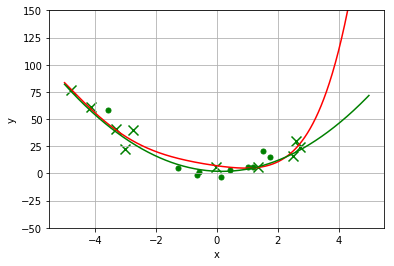

In [49]:
# (IV) plot data
ymin,ymax = -50.0,150.0                     # interval of y data
x_=np.arange(xmin,xmax,0.01)                # densely sampled x values
Y_LSR = np.array([np.dot(W_LSR.T,np.array([phi_polynomial([x],deg)]).T)[0] for x in x_]);   # least squares prediction
Y_true = fun_true(x_).flat

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X.flat,T.flat,c='g',marker='x',s=100)             # plot learning data points (green x)
ax.scatter(X_test.flat,T_test.flat,c='g',marker='.',s=100)   # plot test data points (green .)
ax.plot(x_,Y_LSR.flat, c='r')         # plot LSR regression curve (red)
ax.plot(x_,Y_true, c='g')             # plot true function curve (green)
ax.set_xlabel('x')                    # label on x-axis
ax.set_ylabel('y')                    # label on y-axis
ax.grid()                             # draw a grid
plt.ylim((ymin,ymax))                 # set y-limits
plt.show()                            # show plot on screen

